In [1]:
import pandas as pd

df = pd.read_csv (r'footpods.csv')
df.head(20)

,Time_id,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power
0,13-12-20-08-28-51,right,-7.0,6.1250,6.3125,4365,-115.250,4,745
1,13-12-20-08-28-51,left,6.1,1.0625,1.1250,773,-23.375,13,37
2,13-12-20-08-28-55,left,42.4,9.1875,9.1875,6354,-30.375,14,248
3,13-12-20-08-28-56,right,54.7,13.1875,13.8125,8032,-228.500,10,1490
4,13-12-20-08-28-57,left,7.5,4.2500,3.8750,3766,-30.500,15,146
5,13-12-20-08-28-58,right,39.9,6.8125,7.0625,3856,-93.500,8,744
6,13-12-20-08-28-59,left,4.6,1.7500,1.3125,2837,-59.875,12,121
7,13-12-20-08-29-15,left,-0.6,1.8125,0.8750,2119,-58.125,6,78
8,13-12-20-08-29-15,right,22.6,4.1875,4.5000,1994,-22.125,10,741
9,13-12-20-08-29-16,left,-0.4,1.9375,1.0625,1705,-41.500,2,53


# Research (EDA)

In [2]:
df = df[['pronation','braking','impact','contact_time','flight_ratio','strike','power']]

In [3]:
df.head()

,pronation,braking,impact,contact_time,flight_ratio,strike,power
0,-7.0,6.1250,6.3125,4365,-115.250,4,745
1,6.1,1.0625,1.1250,773,-23.375,13,37
2,42.4,9.1875,9.1875,6354,-30.375,14,248
3,54.7,13.1875,13.8125,8032,-228.500,10,1490
4,7.5,4.2500,3.8750,3766,-30.500,15,146


Checking the data for correlations

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,pronation,braking,impact,contact_time,flight_ratio,strike,power
pronation,1.000000,0.153111,-0.225584,-0.009942,0.083119,-0.131369,-0.467213
braking,0.153111,1.000000,0.302258,-0.051284,0.195972,-0.214481,0.123421
impact,-0.225584,0.302258,1.000000,-0.100919,0.432918,-0.335153,0.249629
contact_time,-0.009942,-0.051284,-0.100919,1.000000,-0.137735,0.030918,0.013960
flight_ratio,0.083119,0.195972,0.432918,-0.137735,1.000000,-0.170977,-0.070699
strike,-0.131369,-0.214481,-0.335153,0.030918,-0.170977,1.000000,0.044376
power,-0.467213,0.123421,0.249629,0.013960,-0.070699,0.044376,1.000000


In [5]:
df.isnull().sum()

pronation       0
braking         0
impact          0
contact_time    0
flight_ratio    0
strike          0
power           0
dtype: int64

In [6]:
df.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power
count,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000
mean,-4.397516,6.300235,13.221157,298.211927,18.734083,6.478445,222.756085
std,11.732299,1.712434,2.998758,658.591346,15.056472,2.661953,72.830390
min,-155.200000,0.000000,0.000000,0.000000,-2760.000000,1.000000,0.000000
25%,-12.600000,5.375000,12.500000,271.000000,16.000000,5.000000,217.000000
50%,-9.800000,6.187500,14.000000,284.000000,18.750000,6.000000,245.000000
75%,5.200000,7.250000,15.062500,295.000000,22.125000,8.000000,262.000000
max,126.100000,15.312500,15.750000,65535.000000,116.125000,16.000000,2249.000000


[[ 15.61512374 150.63037802]
 [ 18.55512752 255.02644855]
 [ 24.84386969  41.85284791]]


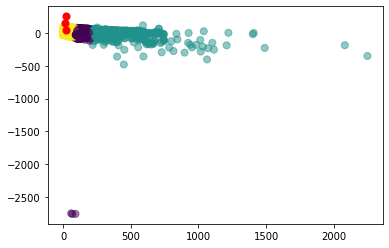

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#chose the input parameters
df_flight_power = df[["flight_ratio","power"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(df_flight_power)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(df_flight_power['power'], df_flight_power['flight_ratio'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[ 1.37454821e+01  2.06641579e+01]
 [ 1.39583333e+00 -2.75733333e+03]
 [ 4.32198372e+00 -1.34872895e+01]]


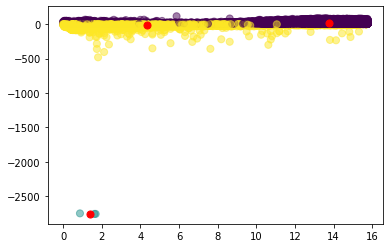

In [8]:
#chose the input parameters
df_impact_flight = df[["impact","flight_ratio"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(df_impact_flight)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(df_impact_flight['impact'], df_impact_flight['flight_ratio'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[150.50449553  10.9827363 ]
 [255.00399604  13.75437314]
 [ 41.82053711  11.74038739]]


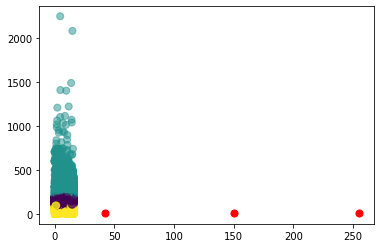

In [9]:
#chose the input parameters
df_impact_power = df[["power","impact"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(df_impact_power)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(df_impact_power['impact'], df_impact_power['power'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[ 2.89387588e+02  1.87933184e+01]
 [ 6.46468148e+04 -3.20416667e+01]
 [ 5.98633333e+03 -1.05214583e+02]]


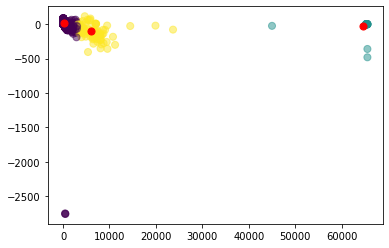

In [10]:
#chose the input parameters
df_contact_flight = df[["contact_time","flight_ratio"]]
#fit the model
kmeans = KMeans(n_clusters=3).fit(df_contact_flight)
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(df_contact_flight['contact_time'], df_contact_flight['flight_ratio'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [11]:
df_contact_flight_clu_0 = df_contact_flight[kmeans.labels_== 0]
print(df_contact_flight_clu_0.count())

contact_time    274240
flight_ratio    274240
dtype: int64


In [12]:
df_contact_flight_clu_1 = df_contact_flight[kmeans.labels_== 1]
print(df_contact_flight_clu_1.count())

contact_time    27
flight_ratio    27
dtype: int64


In [13]:
df_contact_flight_clu_2 = df_contact_flight[kmeans.labels_== 2]
print(df_contact_flight_clu_2.count())

contact_time    120
flight_ratio    120
dtype: int64


In [14]:
df_impact_flight_clu_0 = df_impact_flight[kmeans.labels_== 0]
print(df_impact_flight_clu_0.count())

impact          274240
flight_ratio    274240
dtype: int64


In [15]:
df_impact_flight_clu_1 = df_impact_flight[kmeans.labels_== 1]
print(df_impact_flight_clu_1.count())

impact          27
flight_ratio    27
dtype: int64


In [16]:
df_impact_flight_clu_2 = df_impact_flight[kmeans.labels_== 2]
print(df_impact_flight_clu_2.count())

impact          120
flight_ratio    120
dtype: int64


In [17]:
df_impact_flight_clu_0.describe()

,impact,flight_ratio
count,274240.000000,274240.000000
mean,13.225708,18.793318
std,2.991784,14.666580
min,0.000000,-2760.000000
25%,12.500000,16.000000
50%,14.000000,18.750000
75%,15.062500,22.125000
max,15.750000,89.500000


In [18]:
df_impact_flight_clu_1.describe()

,impact,flight_ratio
count,27.000000,27.000000
mean,1.884259,-32.041667
std,2.355799,113.363879
min,0.125000,-481.250000
25%,0.593750,0.000000
50%,1.187500,0.000000
75%,2.062500,0.000000
max,10.437500,0.000000


In [19]:
df_impact_flight_clu_2.describe()

,impact,flight_ratio
count,120.000000,120.000000
mean,5.371875,-105.214583
std,3.852280,89.963346
min,0.625000,-404.250000
25%,2.375000,-150.218750
50%,4.281250,-95.000000
75%,7.078125,-57.187500
max,15.312500,116.125000


Results & Conclusions: 
- There is no sugnificant correlation between the parameters in footpods.csv 
- Closest correlation results are between (flight_ratio - impact , impact - power, impact - breaking )
- Clustering with x = contact y = flight_ratio with 3 clusters , identifies 274240 rows (99.95 %) as "running, walking" and 147 rows (0.05 %) as "waiting"
- Clustering with x = impact y = flight_ratio with 3 clusters , identifies 274240 rows (99.95 %) as "running, walking" and 147 rows (0.05 %) as "waiting" => same results as with the other cluster
- Power is unsugnificant because the test subject is right footed

[[-4.39085983e+00  6.30124047e+00  1.32257081e+01  2.89387588e+02
   1.87933184e+01  6.47707847e+00  2.22611723e+02]
 [ 4.69629630e+00  3.34722222e+00  1.88425926e+00  6.46468148e+04
  -3.20416667e+01  9.44444444e+00  1.97074074e+02]
 [-2.16541667e+01  4.66666667e+00  5.37187500e+00  5.98633333e+03
  -1.05214583e+02  8.93333333e+00  5.58450000e+02]]


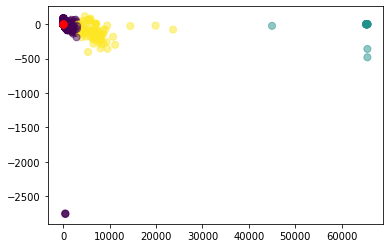

In [20]:
df = pd.read_csv (r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\Exploratory Analysis\footpods.csv')

kmeans = KMeans(n_clusters=3).fit(df[["pronation","braking","impact","contact_time","flight_ratio","strike","power"]])
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(df['contact_time'], df['flight_ratio'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [21]:
df.describe()

,pronation,braking,impact,contact_time,flight_ratio,strike,power
count,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000
mean,-4.397516,6.300235,13.221157,298.211927,18.734083,6.478445,222.756085
std,11.732299,1.712434,2.998758,658.591346,15.056472,2.661953,72.830390
min,-155.200000,0.000000,0.000000,0.000000,-2760.000000,1.000000,0.000000
25%,-12.600000,5.375000,12.500000,271.000000,16.000000,5.000000,217.000000
50%,-9.800000,6.187500,14.000000,284.000000,18.750000,6.000000,245.000000
75%,5.200000,7.250000,15.062500,295.000000,22.125000,8.000000,262.000000
max,126.100000,15.312500,15.750000,65535.000000,116.125000,16.000000,2249.000000


In [22]:
df['foot'] = df['foot'].map({'right': 1, 'left': 0})
df.head()

,Time_id,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power
0,13-12-20-08-28-51,1,-7.0,6.1250,6.3125,4365,-115.250,4,745
1,13-12-20-08-28-51,0,6.1,1.0625,1.1250,773,-23.375,13,37
2,13-12-20-08-28-55,0,42.4,9.1875,9.1875,6354,-30.375,14,248
3,13-12-20-08-28-56,1,54.7,13.1875,13.8125,8032,-228.500,10,1490
4,13-12-20-08-28-57,0,7.5,4.2500,3.8750,3766,-30.500,15,146


In [2]:
import numpy as np
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]])
    kmeanModel.fit(df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]])
 
    distortions.append(sum(np.min(cdist(df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]].shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]].shape[0]
    mapping2[k] = kmeanModel.inertia_

NameError: name 'df_session_1' is not defined

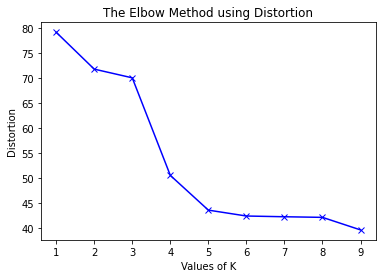

In [24]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# K - means (Music)

In [25]:
df = pd.read_csv (r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\Exploratory Analysis\footpods.csv')
df['foot'] = df['foot'].map({'right': 1, 'left': 0})
df.head()

,Time_id,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power
0,13-12-20-08-28-51,1,-7.0,6.1250,6.3125,4365,-115.250,4,745
1,13-12-20-08-28-51,0,6.1,1.0625,1.1250,773,-23.375,13,37
2,13-12-20-08-28-55,0,42.4,9.1875,9.1875,6354,-30.375,14,248
3,13-12-20-08-28-56,1,54.7,13.1875,13.8125,8032,-228.500,10,1490
4,13-12-20-08-28-57,0,7.5,4.2500,3.8750,3766,-30.500,15,146


[[ 4.91666667e-01 -2.16541667e+01  4.66666667e+00  5.37187500e+00
   5.98633333e+03 -1.05214583e+02  8.93333333e+00  5.58450000e+02]
 [ 5.09671682e-01 -6.85367630e+00  6.42571498e+00  1.36991887e+01
   2.84679082e+02  1.88447529e+01  6.48384384e+00  2.50926950e+02]
 [ 6.66666667e-01  4.69629630e+00  3.34722222e+00  1.88425926e+00
   6.46468148e+04 -3.20416667e+01  9.44444444e+00  1.97074074e+02]
 [ 4.51340215e-01  7.49156790e+00  5.70068444e+00  1.09412913e+01
   3.12104860e+02  1.85451606e+01  6.44443736e+00  8.59983646e+01]]


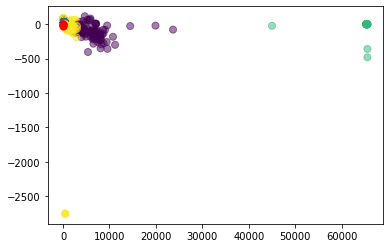

In [26]:
kmeans = KMeans(n_clusters=4).fit(df[["foot","pronation","braking","impact","contact_time","flight_ratio","strike","power"]])
centroids = kmeans.cluster_centers_
print(centroids)
#plot the graph 
plt.scatter(df['contact_time'], df['flight_ratio'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [27]:
df_clu_0 = df[kmeans.labels_== 0]
print(df_clu_0.count())

Time_id         120
foot            120
pronation       120
braking         120
impact          120
contact_time    120
flight_ratio    120
strike          120
power           120
dtype: int64


In [28]:
df_clu_1 = df[kmeans.labels_== 1]
print(df_clu_1.count())

Time_id         227163
foot            227163
pronation       227163
braking         227163
impact          227163
contact_time    227163
flight_ratio    227163
strike          227163
power           227163
dtype: int64


In [29]:
df_clu_2 = df[kmeans.labels_== 2]
print(df_clu_2.count())

Time_id         27
foot            27
pronation       27
braking         27
impact          27
contact_time    27
flight_ratio    27
strike          27
power           27
dtype: int64


In [30]:
df_clu_3 = df[kmeans.labels_== 3]
print(df_clu_3.count())

Time_id         47077
foot            47077
pronation       47077
braking         47077
impact          47077
contact_time    47077
flight_ratio    47077
strike          47077
power           47077
dtype: int64


In [31]:
df_clu_4 = df[kmeans.labels_== 4]
print(df_clu_4.count())

Time_id         0
foot            0
pronation       0
braking         0
impact          0
contact_time    0
flight_ratio    0
strike          0
power           0
dtype: int64


# Original vs Cleaned 

In [40]:
df_clu_0.head()

,Time_id,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power
0,13-12-20-08-28-51,1,-7.0,6.1250,6.3125,4365,-115.250,4,745
2,13-12-20-08-28-55,0,42.4,9.1875,9.1875,6354,-30.375,14,248
3,13-12-20-08-28-56,1,54.7,13.1875,13.8125,8032,-228.500,10,1490
4,13-12-20-08-28-57,0,7.5,4.2500,3.8750,3766,-30.500,15,146
5,13-12-20-08-28-58,1,39.9,6.8125,7.0625,3856,-93.500,8,744


In [34]:
df.describe()

,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power
count,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000,274387.000000
mean,0.499670,-4.397516,6.300235,13.221157,298.211927,18.734083,6.478445,222.756085
std,0.500001,11.732299,1.712434,2.998758,658.591346,15.056472,2.661953,72.830390
min,0.000000,-155.200000,0.000000,0.000000,0.000000,-2760.000000,1.000000,0.000000
25%,0.000000,-12.600000,5.375000,12.500000,271.000000,16.000000,5.000000,217.000000
50%,0.000000,-9.800000,6.187500,14.000000,284.000000,18.750000,6.000000,245.000000
75%,1.000000,5.200000,7.250000,15.062500,295.000000,22.125000,8.000000,262.000000
max,1.000000,126.100000,15.312500,15.750000,65535.000000,116.125000,16.000000,2249.000000


In [37]:
corr = df_clu_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,foot,pronation,braking,impact,contact_time,flight_ratio,strike,power
foot,1.000000,-0.068830,0.299752,0.129360,0.087150,-0.092235,-0.259060,-0.068608
pronation,-0.068830,1.000000,0.292844,-0.278568,-0.112167,0.074270,-0.133952,-0.154697
braking,0.299752,0.292844,1.000000,-0.142425,0.012483,-0.021426,-0.078131,0.050358
impact,0.129360,-0.278568,-0.142425,1.000000,-0.157175,0.265282,-0.142799,0.033730
contact_time,0.087150,-0.112167,0.012483,-0.157175,1.000000,-0.796062,0.068139,0.031193
flight_ratio,-0.092235,0.074270,-0.021426,0.265282,-0.796062,1.000000,-0.137481,0.007439
strike,-0.259060,-0.133952,-0.078131,-0.142799,0.068139,-0.137481,1.000000,0.002009
power,-0.068608,-0.154697,0.050358,0.033730,0.031193,0.007439,0.002009,1.000000


In [94]:
df_clu_0.to_csv(r'C:\Users\Philip Vangelov\Desktop\ADS - Minor\Music Project\Exploratory Analysis\K-means(Music).csv', index = False)